                                            Electricity Anomaly Detection Project

Electricity  Anomaly Detection means the finding of the unusual or abnormal patterns in elecctriity consumption data using the statistical and macchine learning methods.  

Basically,  it helps to  identify when the power usage behaves differently than the normal. 

# An Example to Understand 

Time - Usage Comparison 

9 AM - 120 kWh 

10 AM - 130 kWh 

11 AM -  125 kWh 

But suddenlyy it shows as  

12 PM - 900 kWh  

This is actually  an Anomaly spike. 

                    

Isolation Forest : The Isolation Forest is a Machinne Learning Technique that  helps  in  the detectionn of anomalies. It detects the sudden spikes, unusual values. 

Local  Outlier Factor : It helps in detecting the local outlier factors.  

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot  as plt 
import seaborn as sns 


In [2]:
# Loading the dataset  
df= pd.read_csv("electricity.csv")
df 

,timestamp,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
0,2016-01-01 00:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,123.200,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243
1,2016-01-01 01:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,126.475,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486
2,2016-01-01 02:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,127.825,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486
3,2016-01-01 03:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,130.475,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486
4,2016-01-01 04:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,129.675,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,15.4830,135.2261,3.4357,79.1353,105.6374,465.0898,67.0199,35.7069,16.3231,...,96.925,704.950,111.350,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000
17540,2017-12-31 20:00:00,12.7224,135.9262,3.4087,81.6958,107.7348,463.6895,56.6869,35.7069,16.0831,...,97.550,695.700,115.875,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000
17541,2017-12-31 21:00:00,11.2822,135.1761,3.3546,82.8160,106.1295,461.2890,55.0576,35.5068,16.1631,...,93.825,687.325,111.650,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000
17542,2017-12-31 22:00:00,16.9233,137.6266,3.2876,82.3359,109.6282,460.5889,49.6776,35.7069,14.8829,...,94.150,674.275,111.950,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000


In [3]:
print("Original Shape: ",df.shape) 
# The shape of  the data gets printed 

Original Shape:  (17544, 1579)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 1579 entries, timestamp to Mouse_science_Micheal
dtypes: float64(1578), object(1)
memory usage: 211.3+ MB


In [5]:
df.describe() 

,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,Panther_retail_Gilbert,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
count,17533.000000,17533.000000,17532.000000,17532.000000,17533.000000,17534.000000,17533.000000,17533.000000,17524.000000,17532.000000,...,16110.000000,16116.000000,16113.000000,17483.000000,17540.000000,17544.000000,17544.000000,17379.000000,17544.000000,17544.000000
mean,8.661108,109.326952,5.396102,113.520501,126.329541,392.126185,96.513085,21.725700,27.257845,0.594539,...,181.787028,770.348807,129.774161,6.134131,482.296901,41.447504,708.649868,39.434000,348.329542,180.161176
std,4.900062,56.498653,4.223728,61.636034,71.783004,195.116299,62.818199,13.532895,15.092654,0.408065,...,54.150864,47.807854,37.264065,8.463139,266.172973,18.780824,284.883572,23.680096,144.408599,263.682848
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,83.350000,548.800000,60.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.661300,108.270900,2.676500,89.937400,100.849500,444.385800,56.097800,16.003100,17.923500,0.330100,...,133.425000,734.568750,97.525000,0.000000,310.030500,30.000000,616.111250,25.000000,299.500000,0.000000
50%,9.601900,126.624400,4.761900,133.705800,141.866400,469.390600,96.100600,18.003500,34.646700,0.550100,...,172.487500,763.925000,126.550000,0.000000,433.645000,40.000000,727.702500,32.000000,337.897950,0.000000
75%,12.662500,145.278000,7.952000,158.270500,179.404600,498.371200,148.136600,35.806900,39.047500,0.890200,...,228.875000,803.293750,158.825000,17.644900,671.243250,60.000000,870.693000,56.000000,438.000000,336.448600
max,25.497200,285.451200,27.770400,298.053200,375.038400,1052.711000,279.125900,54.804300,74.733100,1.520300,...,316.350000,925.550000,278.575000,40.816300,1267.846000,100.000000,1487.017000,126.000000,665.000000,2000.000000


Now, we will perform the Data Cleaning and the processing on the data. 

In [6]:
# Removing of the duplicate values 

df = df.drop_duplicates() 
df 

,timestamp,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
0,2016-01-01 00:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,123.200,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243
1,2016-01-01 01:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,126.475,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486
2,2016-01-01 02:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,127.825,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486
3,2016-01-01 03:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,130.475,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486
4,2016-01-01 04:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,129.675,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,15.4830,135.2261,3.4357,79.1353,105.6374,465.0898,67.0199,35.7069,16.3231,...,96.925,704.950,111.350,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000
17540,2017-12-31 20:00:00,12.7224,135.9262,3.4087,81.6958,107.7348,463.6895,56.6869,35.7069,16.0831,...,97.550,695.700,115.875,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000
17541,2017-12-31 21:00:00,11.2822,135.1761,3.3546,82.8160,106.1295,461.2890,55.0576,35.5068,16.1631,...,93.825,687.325,111.650,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000
17542,2017-12-31 22:00:00,16.9233,137.6266,3.2876,82.3359,109.6282,460.5889,49.6776,35.7069,14.8829,...,94.150,674.275,111.950,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000


Now, in this step we will be dropping the time stamp, as because its important to drop the timestamp, so as to allow the easy applicaton of the ML Algorithms and the further pre processing. 

In [7]:
# Dropping of the timestamp is it eists 

if "timestamp" in df.columns:  
    timestamps = df["timestamp"]
    df = df.drop(columns =["timestamp"])

else: 
    timestamps = np.arange(len(df)) 

df 

# The timsstamp column gets removed in the data analysis 

,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,Panther_retail_Gilbert,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,123.200,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,126.475,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,127.825,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,130.475,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,129.675,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,15.4830,135.2261,3.4357,79.1353,105.6374,465.0898,67.0199,35.7069,16.3231,0.6401,...,96.925,704.950,111.350,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000
17540,12.7224,135.9262,3.4087,81.6958,107.7348,463.6895,56.6869,35.7069,16.0831,0.7301,...,97.550,695.700,115.875,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000
17541,11.2822,135.1761,3.3546,82.8160,106.1295,461.2890,55.0576,35.5068,16.1631,0.7201,...,93.825,687.325,111.650,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000
17542,16.9233,137.6266,3.2876,82.3359,109.6282,460.5889,49.6776,35.7069,14.8829,0.7201,...,94.150,674.275,111.950,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000


The next step involves the process of converting to the numeric data.  So, basically, in the below code, we can see that the whole data gets converted to the numeric data and also the missing values are getting filled nd hence its useful here. 

In [8]:
df = df.apply(pd.to_numeric, errors = 'coerce')
df = df.fillna(df.median()) 

df 

,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,Panther_retail_Gilbert,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,123.200,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,126.475,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,127.825,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,130.475,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,129.675,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,15.4830,135.2261,3.4357,79.1353,105.6374,465.0898,67.0199,35.7069,16.3231,0.6401,...,96.925,704.950,111.350,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000
17540,12.7224,135.9262,3.4087,81.6958,107.7348,463.6895,56.6869,35.7069,16.0831,0.7301,...,97.550,695.700,115.875,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000
17541,11.2822,135.1761,3.3546,82.8160,106.1295,461.2890,55.0576,35.5068,16.1631,0.7201,...,93.825,687.325,111.650,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000
17542,16.9233,137.6266,3.2876,82.3359,109.6282,460.5889,49.6776,35.7069,14.8829,0.7201,...,94.150,674.275,111.950,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000


In [10]:
# Now, we apply the scaling of the data, by the Standard Scaler preprocessing.  
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()   

scaled_data = sc.fit_transform(df) 

scaled_data = np.nan_to_num(scaled_data)  

# The Standard Scaling of  the Data is done 

c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


# Model Training  
Now, comes the main part of the model training on the given dataset by using the  Isolation Forest, Local  Outlier Factor and Robust Covariance. 

In [11]:
from sklearn.ensemble import IsolationForest  
iso_model = IsolationForest(contamination = 0.02, random_state = 42) 
iso_model

,n_estimators,100
,max_samples,'auto'
,contamination,0.02
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [12]:
# Prediction from the Isolation Forest model 
iso_pred = iso_model.fit_predict(scaled_data) 
iso_pred = np.where(iso_pred == -1,1,0) 

iso_pred 

array([0, 0, 0, ..., 0, 0, 0], shape=(17544,))

Basically, here we can observe that in the case of anomaly detection, we observe that the Isolation Forest returns the prediction as
 0: Normal and 1: Anomaly 

 But we use the numpy in the form of np.where to know that the iso_pred = -1,1,0. to convert it as 0: Normal and 1: Anomaly   

 Here the isolation Forest detected the sudden spikes and unusual values. 

In [13]:
# Local Outlier Factor 
# Basicalyy the contamination tells that there are 2% anomalies and hence we write 0.02

from sklearn.neighbors import LocalOutlierFactor  

lof_model = LocalOutlierFactor(n_neighbors = 20, contamination = 0.02)  
lof_model 

,n_neighbors,20
,algorithm,'auto'
,leaf_size,30
,metric,'minkowski'
,p,2
,metric_params,None
,contamination,0.02
,novelty,False
,n_jobs,None


In [14]:
lof_pred = lof_model.fit_predict(scaled_data) 
lof_pred = np.where(lof_pred == -1,1,0)    

lof_pred 

array([1, 0, 0, ..., 0, 0, 0], shape=(17544,))

So, basically the Local Outlier factors help in detecting the outlier factors of the anomaly detection. 

# Combining Results 
Now, here we combine the results of the whole data to carry out the further proocessing 

In [18]:
results = pd.DataFrame({
    "IsolationForest" : iso_pred,
    "LOF" : lof_pred
})

results["Final_Anomaly"] = (results.sum(axis = 1) >= 2).astype(int)  

results 

,IsolationForest,LOF,Final_Anomaly
0,0,1,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
17539,0,0,0
17540,0,0,0
17541,0,0,0
17542,0,0,0


In [20]:
# Atteching to  the Original Data 
df_result =  df.copy() 

df_result["Final_Anomaly"] = results["Final_Anomaly"] 
df_result 

,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,Panther_retail_Gilbert,...,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal,Final_Anomaly
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243,0
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486,0
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486,0
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486,0
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,15.4830,135.2261,3.4357,79.1353,105.6374,465.0898,67.0199,35.7069,16.3231,0.6401,...,704.950,111.350,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0
17540,12.7224,135.9262,3.4087,81.6958,107.7348,463.6895,56.6869,35.7069,16.0831,0.7301,...,695.700,115.875,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0
17541,11.2822,135.1761,3.3546,82.8160,106.1295,461.2890,55.0576,35.5068,16.1631,0.7201,...,687.325,111.650,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0
17542,16.9233,137.6266,3.2876,82.3359,109.6282,460.5889,49.6776,35.7069,14.8829,0.7201,...,674.275,111.950,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0


In [21]:
# Printing the Anomaly Counts  
print("\Anomaly Counts: ") 
print(results["Final_Anomaly"].value_counts()) 

\Anomaly Counts: 
Final_Anomaly
0    17526
1       18
Name: count, dtype: int64


<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\91981\AppData\Local\Temp\ipykernel_12456\3676456119.py:2: SyntaxWarning: invalid escape sequence '\A'
  print("\Anomaly Counts: ")


So, here as we can see that there are around 18 anomalies which are created in the whole data. Basically, there are anomalies at around 18 places in the whole data.  

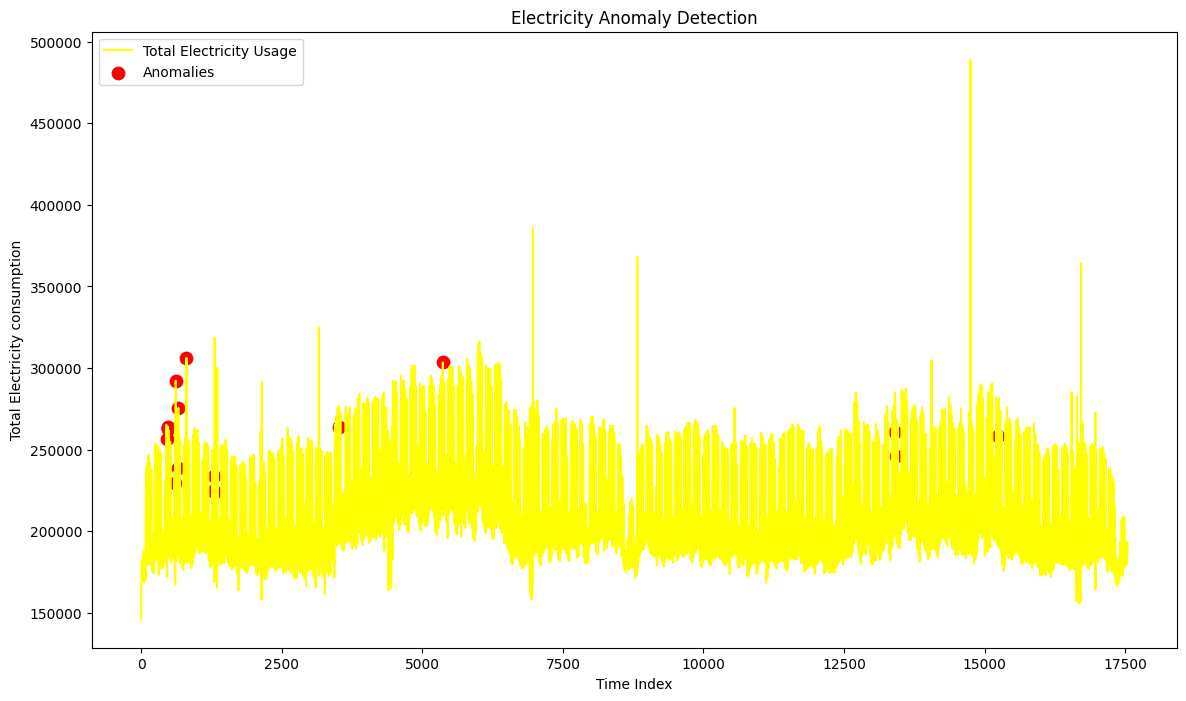

In [37]:
total_usage = df.sum(axis  = 1) 

plt.figure(figsize = (14,8))  

plt.plot(total_usage, label = "Total Electricity Usage",color = 'yellow') 

# Highlighting the anomalities 
anomalies = results["Final_Anomaly"] == 1  

plt.scatter(np.where(anomalies)[0],
            total_usage[anomalies],
            color = "red",
            s = 80,
            label = "Anomalies") 

plt.title("Electricity Anomaly Detection") 
plt.xlabel("Time Index")  
plt.ylabel("Total Electricity consumption") 
plt.legend() 
plt.show() 

# Graph Explanation 
So, here the graph and the scatter plot is plotted for showing the Electricity Time Series Anomaly Detection. The graph basically plots where something unusual happened. 

The Yellow Line exxplains the total electricity usage. It basically tells that: 
1. How electricity was used at each time 
2. The normal pattern of consumption 
3. Peaks and drops in usage  

It tells the normal behaviour of the electricity over time.  

The red dots tell the detected anomalies. 
The points are normaly where: 
1. usage is normally high or low 
2. Patterns Suddenly change  

** Also the Unit of Electricity is in the KwH and the Time Index baxically tells the index or at which time the electricity consumption is taken. 

In [41]:
# Now, we will be saving the results 

df_result.to_csv("electricity_anomaly_results.csv", index=False)

print("\n✅ DONE! Results saved.") 



✅ DONE! Results saved.


In [43]:
results.to_csv("Electricity_Anomaly_Model_Results.csv", index = False) 

print("\n✅ DONE! Results saved.")


✅ DONE! Results saved.
